# Capstone Project - Predicting Severity of Car Crashes (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The goal of this project will be to analyze trends and make predictive models for car crashes using data from the city of Seattle, Washington. The focus will be on general variables that can be applicable to other cities


## Data <a name="data"></a>

This data was recorded by the Seattle Police Department from 2004 to the latest of May, 2020. It is a csv file containing 38 columns and 194,673 rows. It contains various information such as weather, date, location of each accident, etc.
SEVERITYCODE is either 1 or 2, which described by SEVERITYDESC as being either a property only collision (1) or one that resulted in an injury (2). This will be the target value for the analysis.

There will be 5 variables used for the analysis.
INCDATE/INCDTTM is incident date and time. WEATHER indicates the weather conditions at the time of the incident with 11 conditions recorded. ROADCOND is condition of the road with 9 conditions and similarly, LIGHTCOND is the light conditions with 9 as well.

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns

In [2]:
path='https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(path)
df.shape
df.dtypes

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [3]:
df.drop(columns=['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','ADDRTYPE','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','SEVERITYCODE.1','COLLISIONTYPE','JUNCTIONTYPE','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY',
'HITPARKEDCAR', 'PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT'], inplace=True)
df.isnull().sum()

SEVERITYCODE       0
SEVERITYDESC       0
INCDATE            0
INCDTTM            0
WEATHER         5081
ROADCOND        5012
LIGHTCOND       5170
dtype: int64

## Methodology <a name="methodology"></a>

The bulk of the data that will not be used was dropped from the dataframe. Null values from the variable used were also dropped. 

The values of the INCDATE and INCDTTM were not used directly. Values were converted to datetime format for Python from which the weekday and hour of the incident was obtained and put into separate columns. This was to see if the days of the week and hour of the day had significance, since these can be universal factors as well to traffic safety. 

The nature of the data features used in this analysis is categorical and discrete. The goal is to predict whether how severe of a crash in the category of 1 or 2 will result from the selected features. As such, the algorithms selected were K Nearest Neighbor, Logistic Regression and Decision Tree. 



In [4]:
df.dropna(inplace=True)
df.shape

(189337, 7)

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64
Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64
Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, d

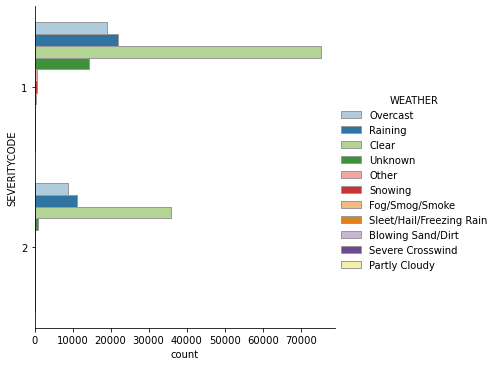

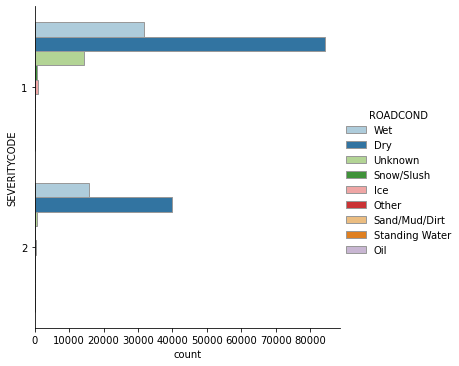

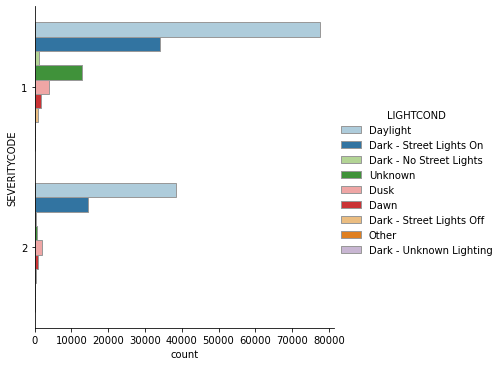

In [5]:
print(df['WEATHER'].value_counts())
print(df['ROADCOND'].value_counts())
print(df['LIGHTCOND'].value_counts())

sns.catplot(y="SEVERITYCODE", hue="WEATHER", kind="count",
            palette="Paired", edgecolor=".6",
            data=df)

sns.catplot(y="SEVERITYCODE", hue="ROADCOND", kind="count",
            palette="Paired", edgecolor=".6",
            data=df)

sns.catplot(y="SEVERITYCODE", hue="LIGHTCOND", kind="count",
            palette="Paired", edgecolor=".6",
            data=df)

<AxesSubplot:xlabel='SEVERITYCODE', ylabel='count'>

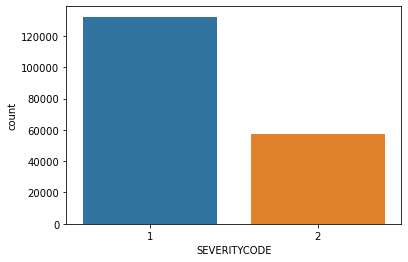

In [6]:
sns.countplot(df['SEVERITYCODE'], data=df)

In [7]:
df['INCDATE']= pd.to_datetime(df['INCDATE'])
df['INCDTTM']= pd.to_datetime(df['INCDTTM'])
print(df.dtypes)

SEVERITYCODE                  int64
SEVERITYDESC                 object
INCDATE         datetime64[ns, UTC]
INCDTTM              datetime64[ns]
WEATHER                      object
ROADCOND                     object
LIGHTCOND                    object
dtype: object


In [8]:
df['dayofweek'] = df['INCDATE'].dt.dayofweek
df['hour'] = df['INCDTTM'].dt.hour

df.head()

,SEVERITYCODE,SEVERITYDESC,INCDATE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,dayofweek,hour
0,2,Injury Collision,2013-03-27 00:00:00+00:00,2013-03-27 14:54:00,Overcast,Wet,Daylight,2,14
1,1,Property Damage Only Collision,2006-12-20 00:00:00+00:00,2006-12-20 18:55:00,Raining,Wet,Dark - Street Lights On,2,18
2,1,Property Damage Only Collision,2004-11-18 00:00:00+00:00,2004-11-18 10:20:00,Overcast,Dry,Daylight,3,10
3,1,Property Damage Only Collision,2013-03-29 00:00:00+00:00,2013-03-29 09:26:00,Clear,Dry,Daylight,4,9
4,2,Injury Collision,2004-01-28 00:00:00+00:00,2004-01-28 08:04:00,Raining,Wet,Daylight,2,8


Text(0.5, 1.0, 'Weekday Car accidents by severity')

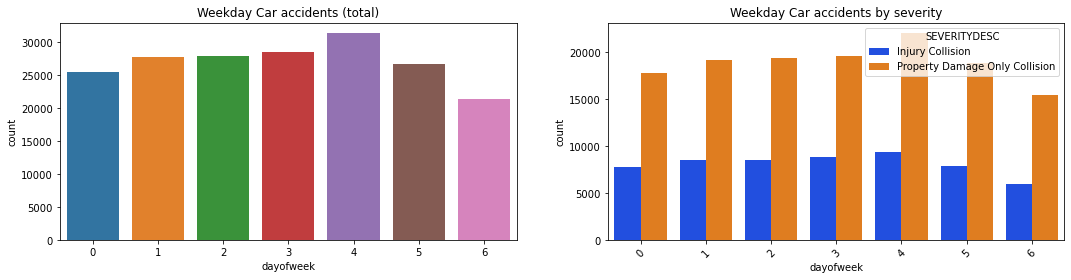

In [9]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 4))

sns.countplot(x="dayofweek", data=df, ax=ax1)
sns.countplot(x="dayofweek", hue="SEVERITYDESC", data=df, ax=ax2,palette="bright")
plt.xticks(rotation=45)
ax1.set_title('Weekday Car accidents (total)')
ax2.set_title('Weekday Car accidents by severity')

Text(0.5, 1.0, 'Hourly car accidents by severity')

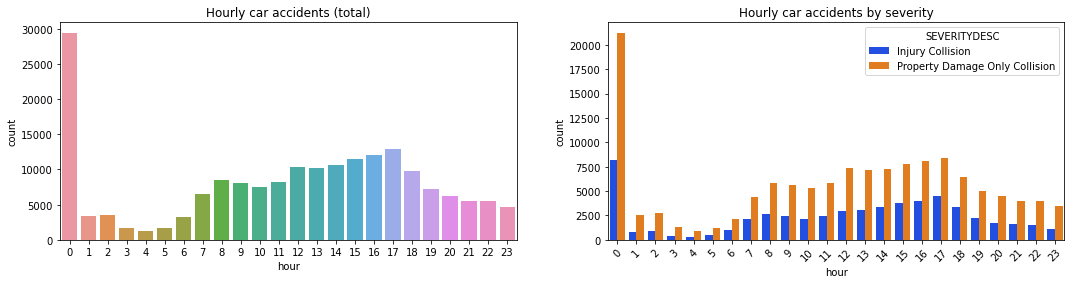

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 4))

sns.countplot(x="hour", data=df, ax=ax1)
sns.countplot(x="hour", hue="SEVERITYDESC", data=df, ax=ax2,palette="bright")
plt.xticks(rotation=45)
ax1.set_title('Hourly car accidents (total)')
ax2.set_title('Hourly car accidents by severity')

In [11]:
le = preprocessing.LabelEncoder()
df['WEATHER'] = le.fit_transform(df['WEATHER'].astype(str))
df['ROADCOND'] = le.fit_transform(df['ROADCOND'].astype(str))
df['LIGHTCOND'] = le.fit_transform(df['LIGHTCOND'].astype(str))
print(df['WEATHER'].value_counts())
print(df['ROADCOND'].value_counts())
print(df['LIGHTCOND'].value_counts())

1     111008
6      33117
4      27681
10     15039
9        901
3        824
2        569
8        113
0         55
7         25
5          5
Name: WEATHER, dtype: int64
0    124300
8     47417
7     15031
1      1206
5       999
3       131
6       115
4        74
2        64
Name: ROADCOND, dtype: int64
5    116077
2     48440
8     13456
6      5889
4      2502
0      1535
1      1192
7       235
3        11
Name: LIGHTCOND, dtype: int64


In [12]:
Feature = df[['WEATHER','ROADCOND','LIGHTCOND','dayofweek','hour']]
X = Feature
y = df['SEVERITYCODE'].values

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.head()

X= preprocessing.StandardScaler().fit(X).transform(X)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]
X_test[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 2.42808457,  1.20211138,  1.51780838, -1.00915533,  0.79850413],
       [-0.72900835, -0.71336432,  0.35269964, -1.00915533, -0.4989937 ],
       [-0.72900835, -0.71336432,  0.35269964, -0.48950561, -0.35482727],
       [-0.72900835,  1.47575077,  0.35269964,  0.03014411, -0.4989937 ],
       [-0.72900835, -0.71336432,  0.35269964, -1.52880505,  0.22183843]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [ ]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 8).fit(X_train, y_train)
knn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr = LogisticRegression(C=0.0001, solver='liblinear')
lr.fit(X_train, y_train)
lr

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
tree.fit(X_train, y_train)
tree

In [ ]:

# KNN
yhat1 = knn.predict(X_test)
kn = yhat1
jaccard = jaccard_similarity_score(y_test, yhat1)
precision = precision_score(y_test, yhat1, average='weighted')
knn_final = ['KNN', round(jaccard,2), round(precision,2)]
print("Train set KNN Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set KNN Accuracy: ", metrics.accuracy_score(y_test, yhat1))
# Decission tree 
yhat1 = tree.predict(X_test)
tr = yhat1
jaccard = jaccard_similarity_score(y_test, yhat1)
precision_tree = precision_score(y_test, yhat1, average='weighted')
tree_final = ['Decision Tree', round(jaccard,2),round(precision_tree,2)]
print("Train set Decission Tree Accuracy: ", metrics.accuracy_score(y_train, tree.predict(X_train)))
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(y_test, yhat1))

# Logistic regression
yhat_proba = lr.predict_proba(X_test)
yhat1 = lr.predict(X_test)
yhat_lr = yhat1
jaccard = jaccard_similarity_score(y_test, yhat1)
precision_lr = precision_score(y_test, yhat1, average='weighted')
lr_final = ['Logistic Regression', round(jaccard,2),round(precision_lr,2)]
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(y_train, lr.predict(X_train)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat1))


In [ ]:
final = pd.DataFrame(data=np.array([knn_final, tree_final, lr_final]),                                      
                      columns=['Algorithm', 'Jaccard', 'Precision'])
final

## Analysis <a name="analysis"></a>

Both Decision Tree and Logistic Regression appear to be equally more accurate than KNN. Both models are about 70% accurate but the precision is lower than KNN.  

## Results and Discussion <a name="results"></a>

The insight from the exploratory analysis reveals that, at least in the case of Seattle, the majority of accidents are property damage that occur under ideal conditions in the day time. The outlier to that trend is crashes occurring at midnight. An interpretation of this trend is that abnormal conditions are not the major cause of collisions, meaning drivers may be more alert at these times overall. Any solution should focus on what occurs during optimal normal driving conditions, where there are more likely to be more drivers on the road overall. 

## Conclusion <a name="conclusion"></a>

The techniques outlined and utilized in this report can be applied to other cities. Model accuracy would benefit from having more factors. Additionally, having an idea of overall traffic might give more predictive value to how likely a crash might even occur, rather than just the severity of possible crashes. If the results found in this report apply to other cities, local government might want to focus more effort in accident reduction during peak or normal driving times.